In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


In [3]:
# Loading our dataset

data = pd.read_csv(r"C:\Users\HP\Desktop\STOCK.csv")


In [4]:
datestrings = data['Date']

# Remove timezone information
datestrings = datestrings.apply(lambda x: x.split('-')[0])

# Convert date strings to Unix timestamps (seconds since the epoch)
unix_timestamps = pd.to_datetime(datestrings).apply(lambda x: x.timestamp())

# Convert Unix timestamps to floats
date_floats = unix_timestamps.astype(float)

# Replace the original date column with the float values
data['Date_Float'] = date_floats


In [5]:
companies = data['Company'].unique()  # Selecting  different companies

# Dictionary to store model evaluations
evaluations = {}

In [6]:
features = ['Open', 'High', 'Low', 'Volume', 'Dividends']


In [7]:
for company in companies:
    # Filter data for the current company
    company_data = data[data['Company'] == company]

    # Features and target variable
    X = company_data[features]
    y = company_data['Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store evaluation metrics
    evaluations[company] = {'Mean Squared Error': mse, 'R-squared': r2}

MODEL'S GETS EVALUTED FOR EACH COMPANY USING EVALUTION METRICS MEAN SQUARED ERROR AND R SQUARED

In [8]:
# Print evaluation metrics for each company
for company, metrics in evaluations.items():
    print(f'{company}:')
    print('Mean Squared Error:', metrics['Mean Squared Error'])
    print('R-squared:', metrics['R-squared'])
    print()

AAPL:
Mean Squared Error: 0.6767858583094308
R-squared: 0.9996964392496135

MSFT:
Mean Squared Error: 1.8529515510509584
R-squared: 0.999654757135907

GOOGL:
Mean Squared Error: 0.3729907617245233
R-squared: 0.9995733927008029

AMZN:
Mean Squared Error: 0.8776491021525172
R-squared: 0.9991030641484674

NVDA:
Mean Squared Error: 5.124223739914115
R-squared: 0.9996302604293129

META:
Mean Squared Error: 3.618454726805035
R-squared: 0.9991774336369689

TSLA:
Mean Squared Error: 7.595692534125275
R-squared: 0.9993906531405221

LLY:
Mean Squared Error: 3.3399077706250395
R-squared: 0.9997971502324495

V:
Mean Squared Error: 1.4440789259776527
R-squared: 0.9981797626033047

TSM:
Mean Squared Error: 0.3188373698574452
R-squared: 0.9996141895959609

UNH:
Mean Squared Error: 6.295288520581891
R-squared: 0.9994902446012988

AVGO:
Mean Squared Error: 10.623430669465174
R-squared: 0.9997017509914825

NVO:
Mean Squared Error: 0.04802004840852671
R-squared: 0.9998957878694537

JPM:
Mean Squared Erro

USER ENTERS COMPANY NAME, DATE AND OTHER NECCESARY VALUES/PARAMETERS USING WHICH USER GETS TO KNOW CLOSING PRICE FOR A PARTICULAR STOCK ON THAT AND ALSO FINDING EVALUTION METRICS TO EVALUTE THE PREDICTION MADE BY THE MODEL


In [9]:
user_company = input("Enter the company name: ")
user_date = input("Enter the date (YYYY-MM-DD): ")
open_price = float(input("Enter opening price: "))
high_price = float(input("Enter high price: "))
low_price = float(input("Enter low price: "))
dividends = float(input("Enter dividends: "))
volume = int(input("Enter volume: "))


# Predict the closing price for the input features
new_data = [[open_price, high_price,low_price,volume,dividends]]
predicted_close = model.predict(new_data)
print('Predicted Close Price for {} on {}: {:.2f}'.format(user_company, user_date, predicted_close[0]))


# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print('Mean Squared Error:', mse)
print('R-squared:', r2)

Predicted Close Price for AAPL on 2024-06-05: 187.37
Mean Squared Error: 0.5654471855100242
R-squared: 0.9664791669435107


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


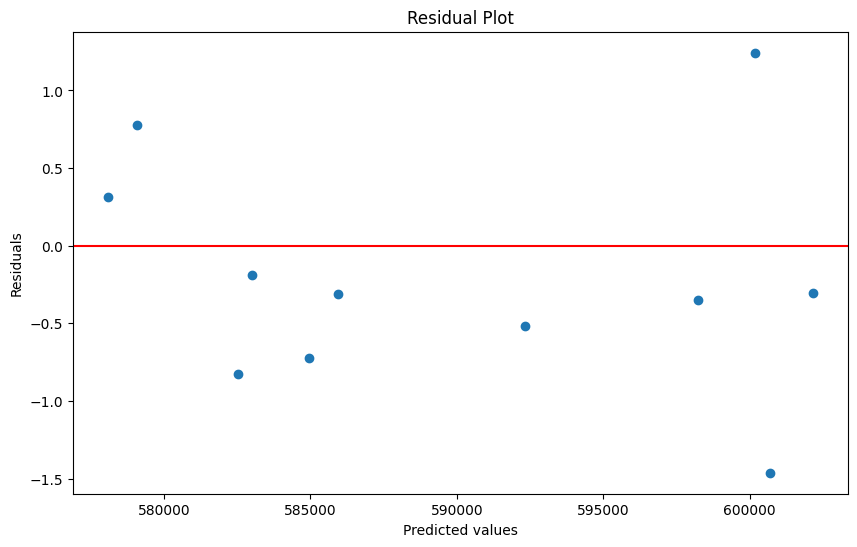

In [10]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

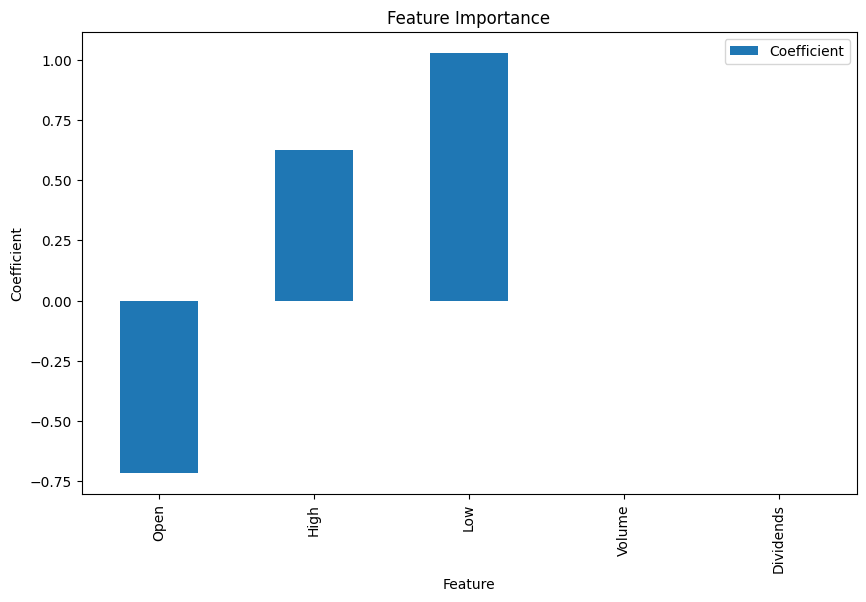

In [11]:
# Feature Importance Plot
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients.plot(kind='bar', x='Feature', y='Coefficient', figsize=(10, 6))
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.show()

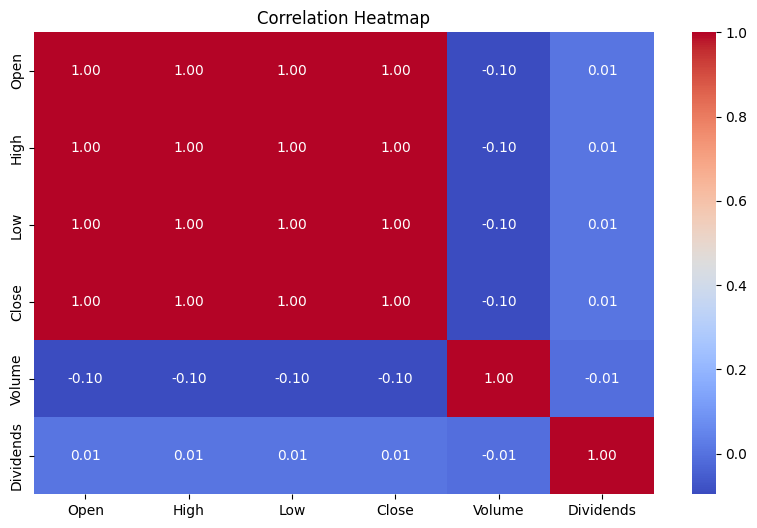

In [12]:
plt.figure(figsize=(10, 6))
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17968\563137727.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_17968\563137727.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])


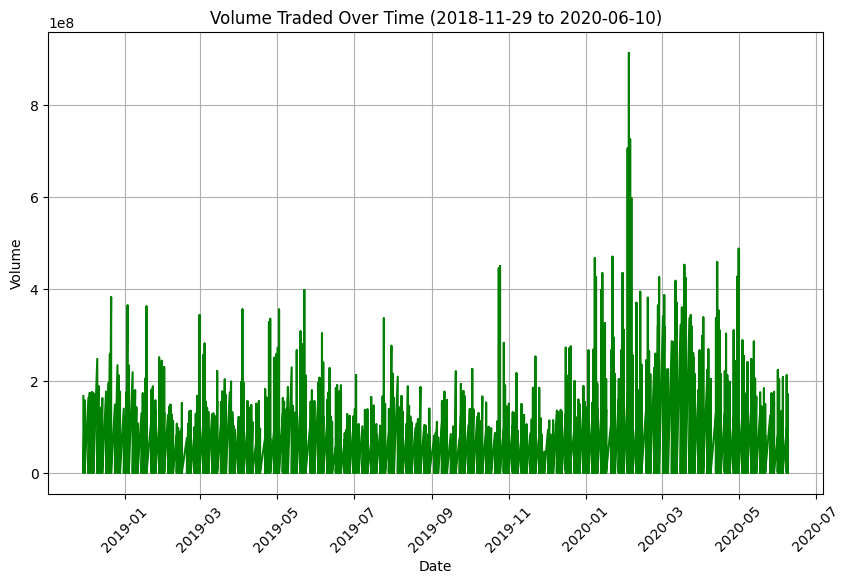

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the stock data
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Filter data for the specified time period
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Convert 'Date' column to datetime
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Plot volume traded over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['Volume'], color='green')
plt.title('Volume Traded Over Time ({} to {})'.format(start_date, end_date))
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17968\3534141151.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date'] = pd.to_datetime(company_data['Date'])


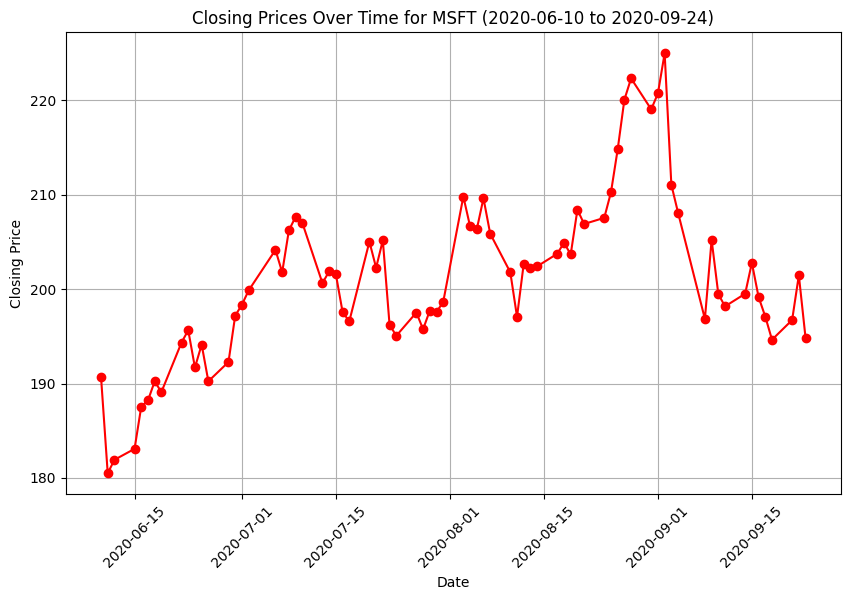

In [14]:
# Assuming 'data' is your DataFrame containing the stock data
company_name = input("Enter company name to plot closing prices over time: ")
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Filter data for the specified company and time period
company_data = data[(data['Company'] == company_name) & (data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Convert 'Date' column to datetime
company_data['Date'] = pd.to_datetime(company_data['Date'])

# Plot closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(company_data['Date'], company_data['Close'], marker='o', linestyle='-', color='red')
plt.title('Closing Prices Over Time for {} ({} to {})'.format(company_name, start_date, end_date))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

PERFORMING HYPERPARAMETER TURNING TO IMPORVE THE MODEL AND EVALUTING THE EVALUTION METRICS FOR EACH COMPANY

In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have defined `companies` list and `data` DataFrame

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    
}

# Dictionary to store best model for each company
best_models = {}

features = ['Open', 'High', 'Low', 'Volume', 'Dividends']

for company in companies:

    # Filter data for the current company
    company_data = data[data['Company'] == company]

    # Features and target variable
    X = company_data[features]
    y = company_data['Close']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Perform Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions
    predictions = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store evaluation metrics and best model
    best_models[company] = {'Best Model': best_model, 'Mean Squared Error': mse, 'R-squared': r2} 

# Print evaluation metrics for each company
for company, metrics in best_models.items():
    print(f'{company}:')
    print('Best Model:', metrics['Best Model'])
    print('Mean Squared Error:', metrics['Mean Squared Error'])
    print('R-squared:', metrics['R-squared'])
    print()

AAPL:
Best Model: LinearRegression(fit_intercept=False)
Mean Squared Error: 0.6770958271677012
R-squared: 0.9996963002183703

MSFT:
Best Model: LinearRegression(fit_intercept=False)
Mean Squared Error: 1.8657214472757224
R-squared: 0.9996523778424256

GOOGL:
Best Model: LinearRegression(fit_intercept=False)
Mean Squared Error: 0.37240216710728247
R-squared: 0.9995740659045005

AMZN:
Best Model: LinearRegression(fit_intercept=False)
Mean Squared Error: 0.88068702319929
R-squared: 0.9990999594676852

NVDA:
Best Model: LinearRegression(fit_intercept=False)
Mean Squared Error: 5.1311397430070285
R-squared: 0.999629761403481

META:
Best Model: LinearRegression(fit_intercept=False)
Mean Squared Error: 3.600759469674982
R-squared: 0.9991814562168819

TSLA:
Best Model: LinearRegression(fit_intercept=False)
Mean Squared Error: 7.517362021542976
R-squared: 0.9993969370246616

LLY:
Best Model: LinearRegression(fit_intercept=False)
Mean Squared Error: 3.340003680901595
R-squared: 0.999797144407325